# SORU 3 (1)

In [1]:
# Helper functions
def pprint(title, val):
    space = (40 - len(title)) * " "

    if type(val) == int or type(val) == float:
        vs = "{:.0f}".format(val)
        indent = (5 - len(vs)) * " "
    else:
        indent = " "

    if type(val) == list:
        tmpVal = val[0]
        val = ",".join([str(elem) for elem in val])
        if type(tmpVal) == int or type(tmpVal) == float:
            vs = "{:.0f}".format(tmpVal)
            indent = (5 - len(vs)) * " "
        else:
            indent = (5 - len(val)) * " "

    print(title, space, ":", indent, val)


def tprint(t):
    dash = len(t) * "-"
    print(t)
    print(dash)

In [2]:
# Soru 1-A, C, E
import statistics

veri = [10, 14, 14, 17, 21, 21, 24, 27, 28, 30, 33, 35, 38, 41, 41, 42, 45, 51, 53, 54, 54, 55, 62, 71, 74, 76, 77, 77,
        77, 88]
pprint("Verilerin Toplamı", sum(veri))

mean = statistics.mean(veri)
pprint("Ortalama", statistics.mean(veri))

ortFark = [(x - mean) for x in veri]
tprint("\nOrtalama Farkları")
print(ortFark)
pprint("Ortalamadan Farkların Toplamı", sum(ortFark))
print()

ortFarkKare = [(x - mean) ** 2 for x in veri]
tprint("\nOrtalama Fark Kareleri")
print(ortFarkKare)
pprint("Ortalama Farkların Karesi Toplamı", sum(ortFarkKare))

print()

pprint("Varyans", round(statistics.variance(veri), 2))
pprint("Std. Sapma", round(statistics.stdev(veri), 2))
pprint("Medyan", statistics.median(veri))
pprint("Mod", statistics.multimode(veri))

qs = statistics.quantiles(veri)
pprint("Çeyreklikler", qs)

pprint("Aralık", veri[-1] - veri[0])
pprint("Çeyreklikler Aralığı", qs[2] - qs[0])

Verilerin Toplamı                         :   1350
Ortalama                                  :     45

Ortalama Farkları
------------------
[-35, -31, -31, -28, -24, -24, -21, -18, -17, -15, -12, -10, -7, -4, -4, -3, 0, 6, 8, 9, 9, 10, 17, 26, 29, 31, 32, 32, 32, 43]
Ortalamadan Farkların Toplamı             :      0


Ortalama Fark Kareleri
-----------------------
[1225, 961, 961, 784, 576, 576, 441, 324, 289, 225, 144, 100, 49, 16, 16, 9, 0, 36, 64, 81, 81, 100, 289, 676, 841, 961, 1024, 1024, 1024, 1849]
Ortalama Farkların Karesi Toplamı         :  14746

Varyans                                   :    508.48
Std. Sapma                                :     22.55
Medyan                                    :     41.5
Mod                                       :     77
Çeyreklikler                              :     26.25,41.5,64.25
Aralık                                    :     78
Çeyreklikler Aralığı                      :     38.0


(<Figure size 750x275 with 1 Axes>, <Axes: >)

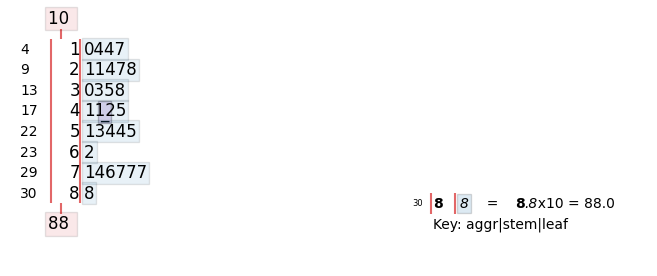

In [3]:
# Soru 1-B
# Dal - yaprak grafiği
import stemgraphic

stemgraphic.stem_graphic(veri, asc=False)

In [4]:
# Soru 1-D
# Çarpıklık
from scipy.stats import skew

sk = skew(veri)
if sk > 0:
    yon = "Sağ"
elif sk < 0:
    yon = "Sol"
else:
    yon = "Simetrik"
pprint("Çarpıklık Katsayısı", sk)
pprint("Çarpıklık Yönü", yon)

Çarpıklık Katsayısı                       :      0.24165031687153363
Çarpıklık Yönü                            :   Sağ


In [35]:
# Soru 1-F
import pandas as pd
import numpy as np

w = 14
binEdges = [int(x) for x in range(min(veri), max(veri) + w, w)]

df = pd.DataFrame(veri)
res = df.apply(lambda x: pd.cut(x, bins=binEdges, right=False).value_counts()).sort_index().add_prefix('Frekans ')
print(res)
print(binEdges)

          Frekans 0
0                  
[10, 24)          6
[24, 38)          6
[38, 52)          6
[52, 66)          5
[66, 80)          6
[80, 94)          1
[10, 24, 38, 52, 66, 80, 94]


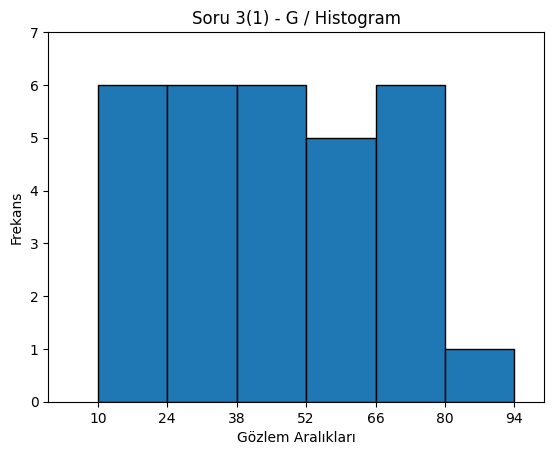

In [39]:
# Soru 1-G / Histogram
import matplotlib.pyplot as plt

plt.hist(veri, bins=binEdges, edgecolor='black')
plt.axis([0, 100, 0, 7])

plt.xticks([i for i in binEdges])

plt.title("Soru 3(1) - G / Histogram")
plt.xlabel("Gözlem Aralıkları")
plt.ylabel("Frekans")

plt.show()


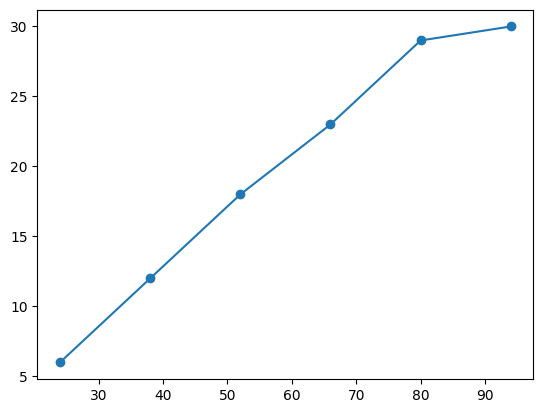

In [7]:
# Soru 1-G / Ogive
values, base = np.histogram(veri, binEdges)
kum = np.cumsum(values)
plt.plot(base[1:], kum, marker="o", linestyle='-')

# Soru 4 (2)

In [40]:
# Soru 2-B
x = [5, 12, 20, 23, 30, 32]
y = [8, 16, 24, 28, 34, 36]

# python 3.10'dan itibaren covarianca ve corelation dahili statistics modülüne eklendi
# <3.10 için numpy kullanılmalı ie:
# numpy.cov(x, y, bias=False)[0][1] // bis=False ise sample, yani n-1
import statistics

cov = statistics.covariance(x, y)
pprint("Cov", cov)

# numpy.corrcoef(x,y)[0][1]
cor = statistics.correlation(x, y)
pprint("Cor", cor)

Cov                                       :    111.86666666666667
Cor                                       :      0.9987897067500333


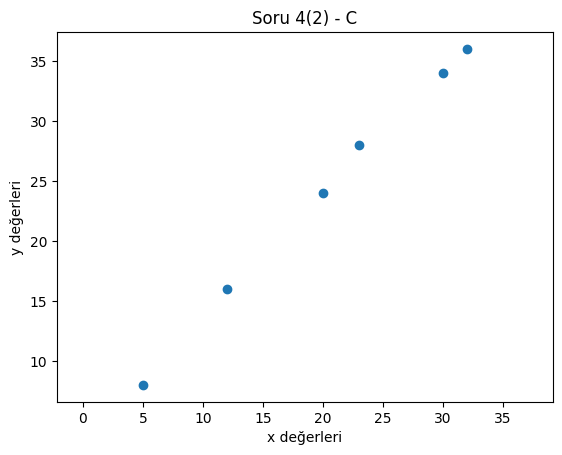

In [28]:
# Soru 2-C
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.title("Soru 4(2) - C")
plt.xlabel("x değerleri")
plt.ylabel("y değerleri")
plt.axis("equal") # hem y hem de x ayn
plt.show()
